# Prisoners Dilemma

[Video](https://youtu.be/DivraIWIwlQ?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

One big area of repeated games is specifically the Prisoner's Dilemma. We have previously defined this as the following game:

$$
A =
\begin{pmatrix}
    3 & 0\\
    5 & 1
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    3 & 5\\
    0 & 1
\end{pmatrix}
$$

The general form is:


$$
A =
\begin{pmatrix}
    R & S\\
    T & P
\end{pmatrix}\qquad
B =
\begin{pmatrix}
    R & T\\
    S & P
\end{pmatrix}
$$

with the following constraints:

$$T > R > P > S$$
$$2R > T + S$$

- The first constraint ensures that the second action "Defect" dominates the first action "Cooperate".
- The second constraint ensures that a social dilemma arises: the sum of the utilities to both players is best when they both cooperate.

This game is a good model of agent (human, etc) interaction: a player can choose to take a slight loss of utility for the benefit of the other play **and** themselves.

As a single one shot game there is not much more to say about the Prisoner's dilemma. It becomes fascinating when studied as a repeated game.

---

## Axelrod's tournaments

[Video](https://youtu.be/Vfcv7k5PRvE?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)


In 1980, Robert Axelrod (a political scientist) invited submissions to a computer tournament version of an iterated prisoners dilemma. This was described in a 1980 paper titled ["Effective Choice in the Prisoner's Dilemma"](http://journals.sagepub.com/doi/abs/10.1177/002200278002400101).

### First tournament

- 15 strategies submitted. 
- Round robin tournament with 200 stages including a 16th player who played uniformly randomly.
- Some very complicated strategies, including for example a strategy that used a $\chi^2$ test to try and identify strategies that were acting randomly. You can read more about this tournament here: http://axelrod.readthedocs.io/en/stable/reference/overview_of_strategies.html#axelrod-s-first-tournament
- The winner (average score) was in fact a very simple strategy: Tit For Tat. This strategy starts by cooperating and then repeats the opponents previous move.

The fact that Tit For Tat won garnered a lot of research (still ongoing) as it showed a mathematical model of how cooperative behaviour can emerge in complex situations (why are we nice to each other?).

---

There is a Python library (`axelrod`) with over 200 strategies that can be used to reproduce this work. You can read the documentation for it here: http://axelrod.readthedocs.io.

Analysing: 100%|██████████| 25/25 [00:00<00:00, 35.71it/s]


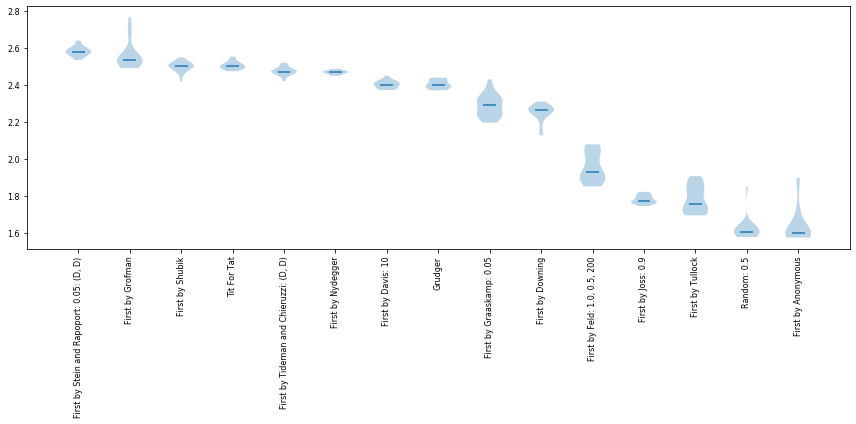

In [1]:
%matplotlib inline

import axelrod as axl

axl.seed(0)  # Make this reproducible
players = [
    axl.TitForTat(),
    axl.FirstByTidemanAndChieruzzi(),
    axl.FirstByNydegger(),
    axl.FirstByGrofman(),
    axl.FirstByShubik(),
    axl.FirstBySteinAndRapoport(),
    axl.Grudger(),
    axl.FirstByDavis(),
    axl.FirstByGraaskamp(),
    axl.FirstByDowning(),
    axl.FirstByFeld(),
    axl.FirstByJoss(),
    axl.FirstByTullock(),
    axl.FirstByAnonymous(),
    axl.Random(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();

We see that Tit For Tat does in fact **not** win this tournament (you can find a tutorial on reproducing the original work at https://axelrod.readthedocs.io/en/stable/tutorials/getting_started/running_axelrods_first_tournament.html). This highlights that there is no such thing as a best strategy but a best strategy for a particular environment.

Here is some of the source code for the strategies:

In [2]:
axl.TitForTat.strategy??

Tit For Tat:

```python
Signature: axl.TitForTat.strategy(self, opponent:axelrod.player.Player) -> str
Source:   
    def strategy(self, opponent: Player) -> Action:
        """This is the actual strategy"""
        # First move
        if not self.history:
            return C
        # React to the opponent's last move
        if opponent.history[-1] == D:
            return D
        return C
File:      ~/anaconda3/envs/gt/lib/python3.6/site-packages/axelrod/strategies/titfortat.py
Type:      function
```

In [3]:
axl.Grudger.strategy??

```python
Signature: axl.Grudger.strategy(opponent:axelrod.player.Player) -> str
Source:   
    @staticmethod
    def strategy(opponent: Player) -> Action:
        """Begins by playing C, then plays D for the remaining rounds if the
        opponent ever plays D."""
        if opponent.defections:
            return D
        return C
File:      ~/anaconda3/envs/gt/lib/python3.6/site-packages/axelrod/strategies/grudger.py
Type:      function
```

## Reactive strategies

[Video](https://youtu.be/Hbb2GcrbtVw?list=PLnC5h3PY-znxMsG0TRYGOyrnEO-QhVwLb)

In 1989 a particular family of strategies was introduced by Martin Nowak. These strategies are defined by two parameters: $(p_1, p_1)$ where:

- $p_1$ is the probability of cooperating after an opponent cooperates;
- $p_2$ is the probability of cooperating after an opponent defects.


---

## Markov chain representation of a Match between two reactive strategies

Consider two reactive players:

$$
p=(p_1, p_2) \qquad q=(q_1, q_2)
$$


If we consider the order of possible states of a match to be:

$$S=\{CC, CD, DC, DD\}$$

then we can summarise a game with the following matrix:

$$
M = 
\begin{pmatrix}
    p_1q_1   & p_1(1-q_1) & (1-p_1)q_1 & (1-p_1)(1-q_1) \\
    p_2q_1   & p_2(1-q_1) & (1-p_2)q_1 & (1-p_2)(1-q_1) \\
    p_1q_2   & p_1(1-q_2) & (1-p_1)q_2 & (1-p_1)(1-q_2) \\
    p_2q_2   & p_2(1-q_2) & (1-p_2)q_2 & (1-p_2)(1-q_2) \\
\end{pmatrix}
$$

---

The matrix $M$ corresponds to a Markov chain. Given a probability vector $\pi$ representing the probability of being in a given state of $S$: the probabilities of being in the a given step in the next round are given by:

$$\pi M$$

If we consider:

$$
p=(1 / 4, 4 / 5) \qquad q=(2 / 5, 1 / 3)
$$

below is some code that calculates the probabilities over 20 turns starting with both strategies cooperating:

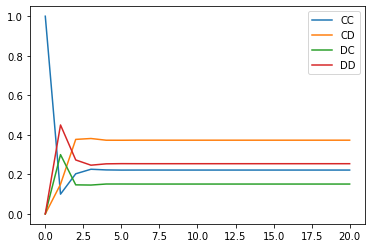

In [4]:
import numpy as np
import matplotlib.pyplot as plt
v_1 = np.array([1 / 4, 4 / 5])
v_2 = np.array([2 / 5, 1 / 3])

M = np.array([[v_1[0] * v_2[0], v_1[0] * (1 - v_2[0]), (1 - v_1[0]) * v_2[0],  (1 - v_1[0]) * (1 - v_2[0])],
              [v_1[1] * v_2[0], v_1[1] * (1 - v_2[0]), (1 - v_1[1]) * v_2[0],  (1 - v_1[1]) * (1 - v_2[0])],
              [v_1[0] * v_2[1], v_1[0] * (1 - v_2[1]), (1 - v_1[0]) * v_2[1],  (1 - v_1[0]) * (1 - v_2[1])],
              [v_1[1] * v_2[1], v_1[1] * (1 - v_2[1]), (1 - v_1[1]) * v_2[1],  (1 - v_1[1]) * (1 - v_2[1])]])

pis = [np.array([1, 0, 0, 0])]
number_of_turns = 20
for _ in range(number_of_turns):
    pis.append(np.dot(pis[-1], M))

labels = ["CC", "CD", "DC", "DD"]
for state, label in zip(zip(*pis), labels):
    plt.plot(state, label=label)
plt.legend();

We see that over time these probabilities no longer change: this is referred to as steady state. A probability vector $\pi$ at steady state is a solution to the following matrix equation:

$$\pi M=\pi$$


---

## Theorem: steady state probabilities for match between reactive players

The steady state of a match between (non deterministic) reactive players is given by:

$$
\pi=(s_1s_2, s_1(1-s_2), (1-s_1)s_2, (1-s_1)(1-s_2))
$$

where:

$$
s_1 = \frac{q_2r_1+p_2}{1-r_1r_2}\qquad s_2 = \frac{p_2r_2+q_2}{1-r_1r_2}
$$

for:

$$r_1=p_1-p_2\qquad r_2=q_1-q_2$$

### Proof

The proof follow (after some heavy algebra) by carrying out the following multiplication:

$$
\pi M = 
(s_1s_2, s1(1-s_2), (1-s_1)s_2, (1-s_1)(1-s_2))
\begin{pmatrix}
    p_1q_1   & p_1(1-q_1) & (1-p_1)q_1 & (1-p_1)(1-q_1) \\
    p_2q_1   & p_2(1-q_1) & (1-p_2)q_1 & (1-p_2)(1-q_1) \\
    p_1q_2   & p_1(1-q_2) & (1-p_1)q_2 & (1-p_1)(1-q_2) \\
    p_2q_2   & p_2(1-q_2) & (1-p_2)q_2 & (1-p_2)(1-q_2) \\
\end{pmatrix}
$$

---

Using this we can obtain the expected utility of the first player:

$$s_1s_2\times R +  s1(1-s_2) \times S +  (1-s_1)s_2 \times T + (1-s_1)(1-s_2)\times P$$

The second player:

$$s_1s_2\times R +  s1(1-s_2) \times T +  (1-s_1)s_2 \times S + (1-s_1)(1-s_2)\times P$$

In [5]:
def theoretic_steady_state(p, q):
    r_1 = p[0] - p[1]
    r_2 = q[0] - q[1]
    s_1 = (q[1] * r_1 + p[1]) / (1 - r_1 * r_2)
    s_2 = (p[1] * r_2 + q[1]) / (1 - r_1 * r_2)
    return np.array([s_1 * s_2, s_1 * (1 - s_2), (1 - s_1) * s_2, (1 - s_1) * (1 - s_2)])

def theoretic_utility(p, q, rstp=np.array([3, 0, 5, 1])):
    pi = theoretic_steady_state(p, q)
    return np.dot(pi, rstp)

In [6]:
theoretic_utility(v_1, v_2), theoretic_utility(v_2, v_1)

(1.675230818539924, 2.784555577382368)

We can confirm this using the Axelrod library:

In [7]:
player_1 = axl.ReactivePlayer(probabilities=v_1)
player_2 = axl.ReactivePlayer(probabilities=v_2)
axl.seed(0)
match = axl.Match(players=(player_1, player_2), turns=5000)
interactions = match.play()
match.final_score_per_turn()

(1.654, 2.799)

## Numerous variants of this tournament have since been carried out:

- Using a Probabilistic end (players don't know how many turns are going to be played). This was carried out in Axelrod's Second tournament, which had 64 strategies and Tit For Tat also won! (Described in a 1980 paper titled: ["More effective choice in the Prisoner's Dilemma"](http://journals.sagepub.com/doi/abs/10.1177/002200278002400301)).
- Playing the tournament on a Graph. This was carried out by Nowak in 1992 in a paper titled: ["Evolutionary games and Spatial chaos"](https://www.researchgate.net/profile/Martin_Nowak2/publication/216634494_Evolutionary_Games_and_Spatial_Chaos/links/54217b730cf274a67fea8e60/Evolutionary-Games-and-Spatial-Chaos.pdf).
- Understanding Evolutionary dynamics (we will understand what we mean by this in the later chapters as we start exploring evolutionary game theory).
- A specific type of strategy has recently garnered a lot of interest: Zero Determinant Strategies (in a 2012 paper titled: [Iterated Prisoner’s Dilemma contains strategies that dominate any evolutionary opponent](http://www.pnas.org/content/109/26/10409.short)). Claiming that memory does not matter. We will discuss this in further chapters.